# Target Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
x = np.random.uniform(low=5, high=20, size=100)
e = np.random.normal(loc=0, scale=0.5, size=100)

y = (x + e) ** 3

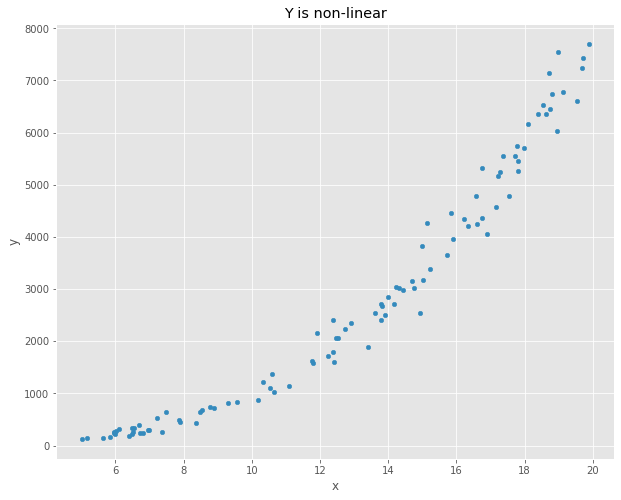

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))

pd.DataFrame({'x': x, 'y': y}).plot(
    title='Y is non-linear',
    kind='scatter',
    x='x', y='y', 
    ax=ax
)

fig.show()

In [4]:
x

array([18.09103175, 18.54291248, 10.18595125,  5.95571629, 15.00784433,
       17.37714194, 19.54058226, 15.71558088, 18.6363761 ,  8.9015629 ,
        7.21448724, 14.9396964 , 11.75822176, 14.23208728,  6.40829824,
       12.413946  ,  5.96940947, 18.72294814, 12.23273289, 13.79518888,
        5.16959384,  6.80585043, 14.69168623, 16.89593583,  5.84830945,
        9.29643104,  7.88126266,  6.55994978, 15.83710013,  6.703728  ,
       17.55462506, 16.74381239, 12.3968921 , 17.21780039, 12.7391676 ,
       11.91871089, 13.83063962, 13.90248796,  7.49305588,  8.35541402,
       14.31204705, 10.53438339, 13.78857801, 15.21714082,  6.5276111 ,
       17.99247992, 18.73293396, 16.57644685, 13.42074461,  6.95197027,
       11.79387127, 17.16054378, 10.60098947,  5.6375051 , 17.71021119,
        7.35715919,  5.01363829, 16.60107846, 12.90292707, 12.53854694,
       18.79440552,  6.48012105, 16.34415132, 15.91741028, 13.60540916,
       12.47021834, 15.15345322, 13.99922884, 19.72939993, 18.98

In [5]:
x = x.reshape((x.shape[0],1))
x

array([[18.09103175],
       [18.54291248],
       [10.18595125],
       [ 5.95571629],
       [15.00784433],
       [17.37714194],
       [19.54058226],
       [15.71558088],
       [18.6363761 ],
       [ 8.9015629 ],
       [ 7.21448724],
       [14.9396964 ],
       [11.75822176],
       [14.23208728],
       [ 6.40829824],
       [12.413946  ],
       [ 5.96940947],
       [18.72294814],
       [12.23273289],
       [13.79518888],
       [ 5.16959384],
       [ 6.80585043],
       [14.69168623],
       [16.89593583],
       [ 5.84830945],
       [ 9.29643104],
       [ 7.88126266],
       [ 6.55994978],
       [15.83710013],
       [ 6.703728  ],
       [17.55462506],
       [16.74381239],
       [12.3968921 ],
       [17.21780039],
       [12.7391676 ],
       [11.91871089],
       [13.83063962],
       [13.90248796],
       [ 7.49305588],
       [ 8.35541402],
       [14.31204705],
       [10.53438339],
       [13.78857801],
       [15.21714082],
       [ 6.5276111 ],
       [17

In [6]:
y

array([6165.07930796, 6523.73053674,  879.21778941,  262.60353061,
       3818.98075929, 5552.74253059, 6607.9461331 , 3656.49192497,
       6363.78424892,  723.73806331,  525.88839594, 2532.06833827,
       1630.02256436, 3030.98795796,  173.36912333, 1610.50510928,
        232.73594262, 7150.21895171, 1721.58439372, 2704.92519026,
        147.67757238,  246.48662513, 3158.52333854, 4052.79293111,
        168.43879838,  818.71579337,  492.22431904,  327.47965758,
       4462.92887789,  402.47316078, 4790.56129008, 5319.03484796,
       1788.89708729, 5166.82728481, 2241.6697518 , 2158.71751426,
       2676.05924744, 2495.16235877,  635.91859739,  438.91477409,
       3012.17813784, 1110.93357118, 2398.03588246, 3390.68488153,
        268.38365532, 5712.14008438, 6451.74016801, 4782.36415679,
       1891.82149884,  305.46031101, 1575.77811518, 4576.51485181,
       1378.11005522,  150.46650782, 5553.26955969,  261.07638073,
        124.04197988, 4244.91744668, 2342.09977697, 2061.21880

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [8]:
from sklearn.linear_model import Ridge

rgs = Ridge()
rgs.fit(x_train, y_train)
y_pred = rgs.predict(x_test)

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

print(
    'MAE={:.0f}, R2={:2f}'.format(
        mean_absolute_error(y_test, y_pred),
        r2_score(y_test, y_pred),
    )
)

MAE=626, R2=0.861536


In [10]:
class YTransformer:
    
    def __init__(self, power=1):
        self.power = power
        
    def fit(self, x, y):
        pass
    
    def transform(self, x, y):
        return x, np.power(y, self.power)
    
    def inverse_transform(self, x, y):
        return x, np.power(y, 1/self.power)
    
    
    def fit_transform(self, x, y):
        return self.transform(x, y)

In [11]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

for power in [1, 1/2, 1/3, 1/4, 1/5]:

    yt = YTransformer(power)
    _, y_train_t = yt.fit_transform(None, y_train)
    _, y_test_t = yt.transform(None, y_test)
    
    rgs = Ridge()

    rgs.fit(x_train, y_train_t)
    y_pred_t = rgs.predict(x_test)
    
    _, y_pred = yt.inverse_transform(None, y_pred_t)

    print(
        'Trasfomed y^{:.2f}: MAE={:.0f}, R2={:.2f}'.format(
            power,
            mean_absolute_error(y_test, y_pred),
            r2_score(y_test, y_pred),
        )
    )

Trasfomed y^1.00: MAE=626, R2=0.86
Trasfomed y^0.50: MAE=264, R2=0.97
Trasfomed y^0.33: MAE=210, R2=0.98
Trasfomed y^0.25: MAE=231, R2=0.97
Trasfomed y^0.20: MAE=259, R2=0.96
